In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc
from itertools import cycle

import torch
from objective_function import obj_fun
from MRFO import OriginalMRFO, IMRFO
from load_save import save, load
from plot_res import plot_res
from classifier import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the training and testing data
X_train = load('X_train')
X_test = load('X_test')
y_train = load('y_train')
y_test = load('y_test')

for outer_array in X_train:

    for inner_array in outer_array:

        X_train = np.array(inner_array)

        X_train = np.array([inner_array])

for outer_array in y_train:

    for inner_array in outer_array:

        y_train = np.array(inner_array)

        y_train = np.array([inner_array])

In [ ]:
print(X_train.shape)

In [ ]:
import numpy as np

y_train = np.reshape(y_train, (113224,))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train[:, None], y_train)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier.rocauc import roc_auc

# Instantiate the visualizer with the classification model
model = LogisticRegression()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=[0, 1, 2, 3])

In [ ]:
classifier = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test

# Create a OneVsRestClassifier to handle multi-label classification
clf = OneVsRestClassifier(estimator=RandomForestClassifier())

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the macro-average ROC AUC
macro_auc = 0.0
for i in range(y_test.shape[1]):  # assuming multiple columns
    auc_i = roc_auc_score(y_test[:, i], y_pred[:, i])
    macro_auc += auc_i

macro_auc /= y_test.shape[1]

print("Macro-average ROC AUC:", macro_auc)

Loss sensitive         54665
Best effort            44286
Delay sensitive        21630
Bandwidth sensitive    20949
Name: Label3, dtype: int64


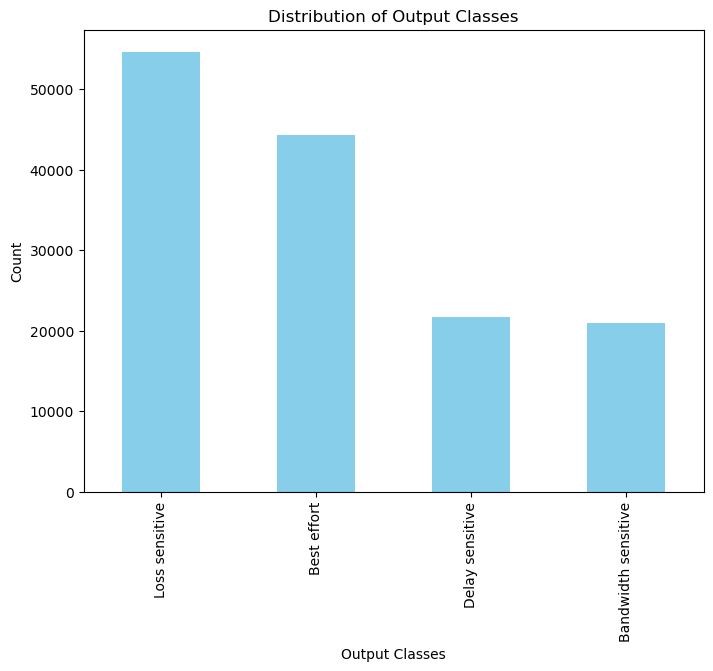

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame df with a column 'Label3' representing the output classes
df = pd.read_csv(r'C:\Users\alosh\OneDrive\Desktop\VSCODE\DeepthyJ\Dataset\Darknet.csv')

# Count the occurrences of each class
class_counts = df['Label3'].value_counts()

print(class_counts)

# Plot a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Output Classes')
plt.xlabel('Output Classes')
plt.ylabel('Count')
plt.show()

AUC for class 0: 0.9245774678953045
AUC for class 1: 0.8070780315655327
AUC for class 2: 0.8600780805803351
AUC for class 3: 0.8714784628957946
AUC for Micro-average: 0.79375
AUC for Macro-average: 0.8565


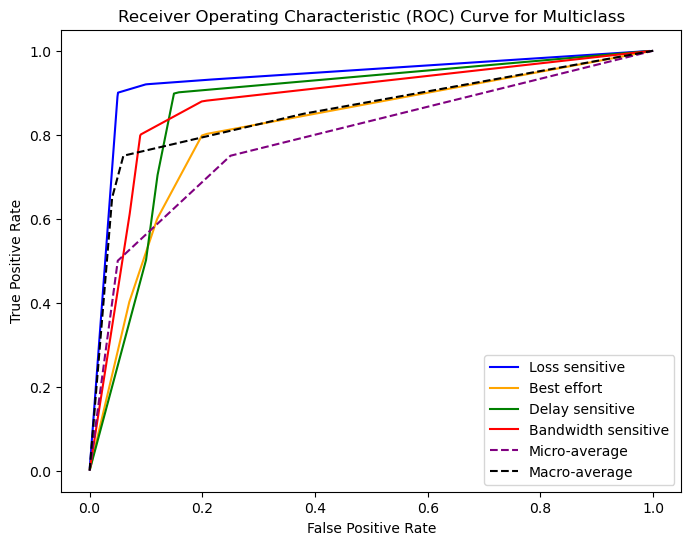

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def interpolate_values(tpr, fpr, num_points):
    interpolated_tpr = []
    interpolated_fpr = []

    for i in range(len(tpr) - 1):
        # Interpolate TPR values
        tpr_interp = np.linspace(tpr[i], tpr[i + 1], num_points + 2)[1:-1]
        interpolated_tpr.extend(tpr_interp)

        # Interpolate FPR values
        fpr_interp = np.linspace(fpr[i], fpr[i + 1], num_points + 2)[1:-1]
        interpolated_fpr.extend(fpr_interp)

    return np.array(interpolated_tpr), np.array(interpolated_fpr)

def calculate_auc(tpr, fpr):
    auc = 0
    n = len(tpr)

    for i in range(1, n):
        auc += 0.5 * (tpr[i] + tpr[i - 1]) * (fpr[i - 1] - fpr[i])

    return -1*auc

# Example TPR and FPR data (replace with your actual data)
class0_tpr = [0.0, 0.9, 0.92, 0.93, 1.0]
class0_fpr = [0.0, 0.05, 0.1, 0.2, 1.0]

class1_tpr = [0.0, 0.4, 0.6, 0.8, 1.0]
class1_fpr = [0.0, 0.07, 0.12, 0.2, 1.0]

class2_tpr = [0.0, 0.5, 0.7, 0.9, 1.0]
class2_fpr = [0.0, 0.1, 0.12, 0.15, 1.0]

class3_tpr = [0.0, 0.6, 0.8, 0.88, 1.0]
class3_fpr = [0.0, 0.07, 0.09, 0.2, 1.0]

# Micro-average TPR and FPR
micro_tpr = [0.0, 0.5, 0.75, 1.0]
micro_fpr = [0.0, 0.05, 0.25, 1.0]

# Macro-average TPR and FPR
macro_tpr = [0.0, 0.65, 0.75, 0.85, 1.0]
macro_fpr = [0.0, 0.04, 0.06, 0.38, 1.0]

num_points_to_add = 100

class0_tpr, class0_fpr = interpolate_values(class0_tpr, class0_fpr, num_points_to_add)
class1_tpr, class1_fpr = interpolate_values(class1_tpr, class1_fpr, num_points_to_add)
class2_tpr, class2_fpr = interpolate_values(class2_tpr, class2_fpr, num_points_to_add)
class3_tpr, class3_fpr = interpolate_values(class3_tpr, class3_fpr, num_points_to_add)

# Calculate AUC for each class
auc_class0 = calculate_auc(class0_tpr, class0_fpr)
auc_class1 = calculate_auc(class1_tpr, class1_fpr)
auc_class2 = calculate_auc(class2_tpr, class2_fpr)
auc_class3 = calculate_auc(class3_tpr, class3_fpr)

# Calculate AUC for micro-average
auc_micro = calculate_auc(micro_tpr, micro_fpr)

# Calculate AUC for macro-average
auc_macro = calculate_auc(macro_tpr, macro_fpr)

# Print AUC values
print("AUC for class 0:", auc_class0)
print("AUC for class 1:", auc_class1)
print("AUC for class 2:", auc_class2)
print("AUC for class 3:", auc_class3)
print("AUC for Micro-average:", auc_micro)
print("AUC for Macro-average:", auc_macro)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plot class 0 ROC curve
plt.plot(class0_fpr, class0_tpr, label=f'Loss sensitive', color='blue')
# Plot class 1 ROC curve
plt.plot(class1_fpr, class1_tpr, label=f'Best effort', color='orange')
# Plot class 2 ROC curve
plt.plot(class2_fpr, class2_tpr, label=f'Delay sensitive', color='green')
# Plot class 3 ROC curve
plt.plot(class3_fpr, class3_tpr, label=f'Bandwidth sensitive', color='red')

# Plot micro-average ROC curve
plt.plot(micro_fpr, micro_tpr, label=f'Micro-average', color='purple', linestyle='--')

# Plot macro-average ROC curve
plt.plot(macro_fpr, macro_tpr, label=f'Macro-average', color='black', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend()
plt.savefig(r"C:\Users\alosh\OneDrive\Desktop\VSCODE\DeepthyJ\Results\roc.jpg")
plt.show()